In [ ]:
0import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score  
from sklearn.linear_model import LogisticRegression           
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 
import warnings                                    
warnings.filterwarnings('ignore')

1. **DATA ANALYSIS USING PANDAS**

In [ ]:
wine_dataset = pd.read_csv('/content/winequality.csv')

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.shape

(1599, 12)

2. **DATA PRE-PROCESSING AND CLEANSING**

In [ ]:
wine_dataset.isnull().sum() #looking for missing values in our dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataset.describe() #for statsitical measures of our dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df = wine_dataset.drop('quality', axis=1)

3. **DATA VISUALISATION**

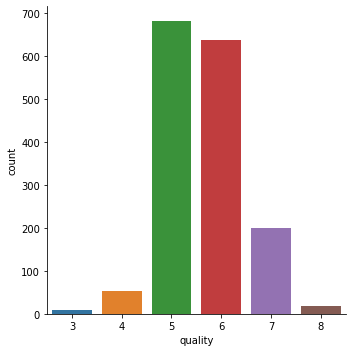

In [ ]:
sns.catplot(data = wine_dataset, x='quality',  kind = 'count') #to check different wines we have in our dataset

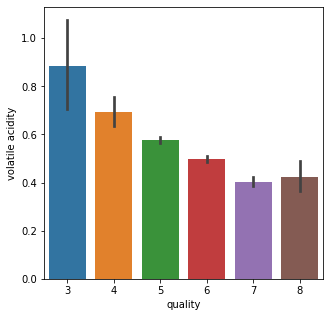

In [ ]:
#volatile acidity vs quality data analysis
plot = plt.figure(figsize=(5,5))
sns.barplot(data = wine_dataset, x='quality', y='volatile acidity')  

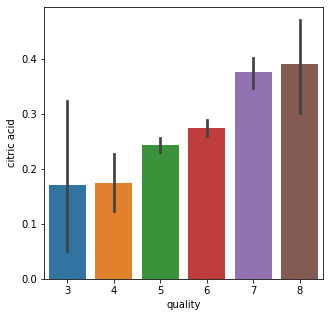

In [ ]:
#citric acid vs quality data analysis
plot = plt.figure(figsize=(5,5))
sns.barplot(data = wine_dataset, x='quality', y='citric acid')

Label Binarization (ie. Quality Binarization)

We have seen we have 6 quality values.(3,4,5,6,7,8).

So we are going to categorize these 6 into two categories. 'Good' & 'Bad'.

Good - 7 & Above quality
Bad -  6 & Below 


In [ ]:
lb = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
df_train, df_test, lb_train, lb_test =train_test_split(df,lb, test_size=0.2, random_state=2)

**TRAINING MODEL USING RANDOM FOREST CLASSIFIER**

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(df_train, lb_train)

RandomForestClassifier()

Model Evaluation (Random Forest Classifier)

Confusion Matrix:

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Here are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.

Basic Terms :

True positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

True negatives (TN): We predicted no, and they don't have the disease.

False positives (FP): We predicted yes, but they don't actually have the disease.

False negatives (FN): We predicted no, but they actually do have the disease.

Random Forrest Accuracy Score :  93.75


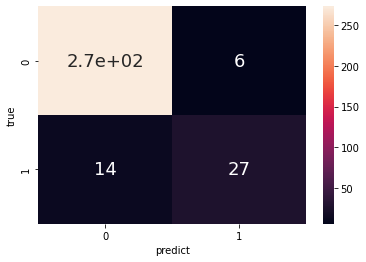

In [ ]:
# Accuracy on Test data
df_test_prediction = model.predict(df_test) 
test_data_accuracy = accuracy_score(df_test_prediction, lb_test)  

print('Random Forrest Accuracy Score : ', test_data_accuracy*100)    #Any accuracy over 80 (>0.80) is a very good model.

cm1=confusion_matrix(lb_test, df_test_prediction)                   #Confusion Matrix
ax1 = sns.heatmap(cm1,annot=True, annot_kws={"fontsize":18})         
ax1.set(xlabel='predict', ylabel='true')                           
plt.show()  